<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/Custom_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow import keras
from tensorflow.keras import layers 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential 
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tqdm import tqdm

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train=x_train/255
x_test = x_test/255
x_train=x_train
x_test=x_test


11490434/11490434 [==============================] - 0s 0us/step


# Customize our own Dense Layer

In [3]:

class MyDense(tf.keras.layers.Layer):

  def __init__(self, units):
      super(MyDense, self).__init__()
      self.units = units
   #define the weights and bias for given units   
  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='zeros',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='zeros',
                               trainable=True)
   #call function to excute with predicted y = x W^T + B\
   # we can still change this formula to ploynimial for example 
  def call(self, inputs):
      y =  tf.matmul(inputs, self.w) + self.b
      return y

 # define our relu function with some threshold   
class MyRule(tf.keras.layers.Layer):
  def __init__(self):
    super(MyRule,self).__init__()

  def call(self,x):
    return tf.math.maximum(-0.1,x)
# define the softmax function
class Mysoftmax(tf.keras.layers.Layer):
  def __init__(self):
    super(Mysoftmax,self).__init__()

  def call(self,x):
    return tf.math.exp(x)/tf.math.reduce_sum(tf.math.exp(x)) 


# Our custom model 

In [5]:
#Create a class model 
class Mymodel(keras.Model):
    def __init__(self,outputs=10):
         super(Mymodel,self).__init__()
         self.outputs=outputs
         self.dense1 = tf.keras.layers.Flatten(input_shape=(28,28))
         self.dense3= MyDense(10)
         self.relu = MyRule()
         self.softmax=Mysoftmax()

    def call(self,inputs):
        x = self.dense1(inputs)
        x = self.relu(x)
        x = self.dense3(x)
        x = self.softmax(x)

        return x

model = Mymodel()

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=256,validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 1s 5ms/step - loss: 0.9312 - accuracy: 0.8186 - val_loss: 0.5044 - val_accuracy: 0.8808
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.4648 - accuracy: 0.8836 - val_loss: 0.3867 - val_accuracy: 0.9021
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3867 - accuracy: 0.8988 - val_loss: 0.3434 - val_accuracy: 0.9102
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.3505 - accuracy: 0.9053 - val_loss: 0.3205 - val_accuracy: 0.9130
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.9100 - val_loss: 0.3067 - val_accuracy: 0.9181
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3148 - accuracy: 0.9137 - val_loss: 0.2962 - val_accuracy: 0.9199
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.9165 - val_loss: 0.2910 - val_accuracy: 0.9193
Epoch 

In [ ]:
model.evaluate(x_test,y_test,verbose=0)[-1]

0.9271000027656555

In [12]:
n_epochs = 20
batch_size = 256
n_steps = len(x_train) // batch_size


In [6]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [7]:
def loss(model, x, y, training):
  y_ = model(x, training=training)
  return loss_object(y, y_)


In [8]:
def grad(model,x1,y1):
  with tf.GradientTape() as g:
    losses = loss(model,x1,y1, training=True)
  return losses, g.gradient(losses, model.trainable_variables)

# Train the model 

In [38]:
Loss, Accuracy=[],[]
for epoch in range(n_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  for q in range(batch_size):
    random_index = np.random.randint(batch_size)
    xi = x_train[random_index:random_index+1]
    yi = y_train[random_index:random_index+1]
    loss_value, grads = grad(model, xi, yi)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg.update_state(loss_value)
    epoch_accuracy.update_state(yi, model(xi, training=True))
  Loss.append(epoch_loss_avg.result())
  Accuracy.append(epoch_accuracy.result())
  tf.print('Epoch Number= {}   Accuracy= {}   Loss= {} '.format(epoch,epoch_accuracy.result(),epoch_loss_avg.result()))  
 


Epoch Number= 0   Accuracy= 1.0   Loss= 0.01436943281441927 
Epoch Number= 1   Accuracy= 1.0   Loss= 0.011737814173102379 
Epoch Number= 2   Accuracy= 1.0   Loss= 0.013170748017728329 
Epoch Number= 3   Accuracy= 1.0   Loss= 0.010467846877872944 
Epoch Number= 4   Accuracy= 1.0   Loss= 0.012771555222570896 
Epoch Number= 5   Accuracy= 1.0   Loss= 0.011151863262057304 
Epoch Number= 6   Accuracy= 1.0   Loss= 0.013255862519145012 
Epoch Number= 7   Accuracy= 1.0   Loss= 0.01130200456827879 
Epoch Number= 8   Accuracy= 1.0   Loss= 0.011358722113072872 
Epoch Number= 9   Accuracy= 1.0   Loss= 0.012419432401657104 
Epoch Number= 10   Accuracy= 1.0   Loss= 0.011082415468990803 
Epoch Number= 11   Accuracy= 1.0   Loss= 0.013491456396877766 
Epoch Number= 12   Accuracy= 1.0   Loss= 0.011804156936705112 
Epoch Number= 13   Accuracy= 1.0   Loss= 0.010788763873279095 
Epoch Number= 14   Accuracy= 1.0   Loss= 0.011090685613453388 
Epoch Number= 15   Accuracy= 1.0   Loss= 0.010771478526294231 
Epoc

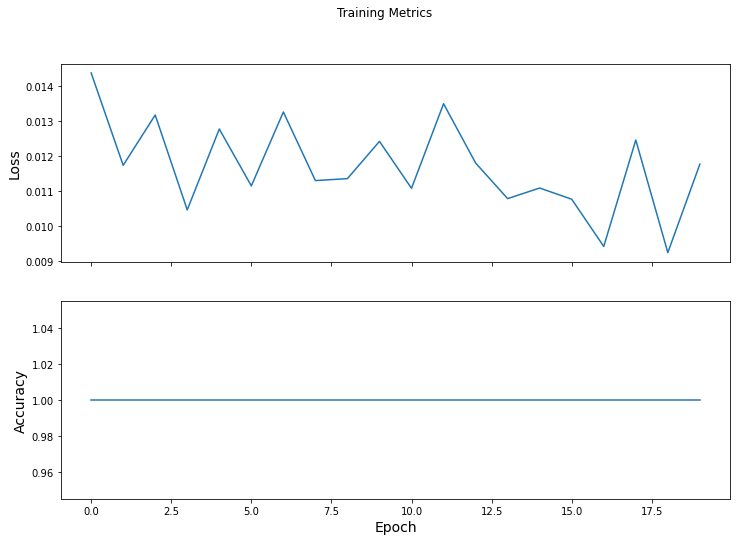

In [40]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(Loss)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(Accuracy)
plt.show()
